In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression


boston_data, boston_target = datasets.load_boston(return_X_y=True)
df = pd.DataFrame(data=boston_data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x24D7BF28>,
      dtype=object)

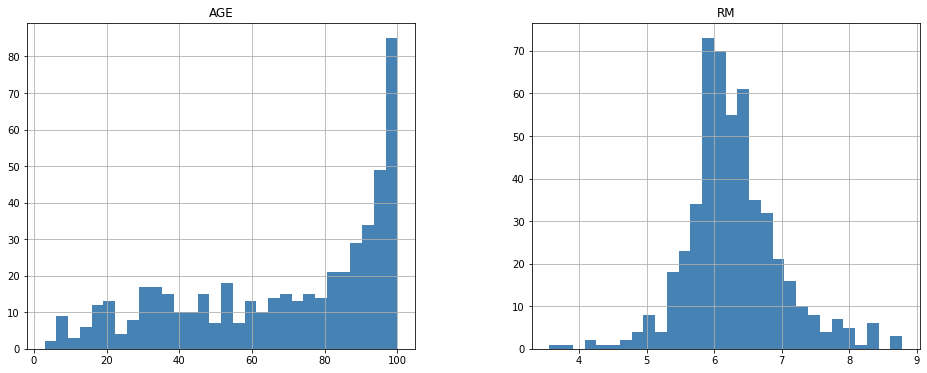

In [6]:
df.hist(['RM', 'AGE'], bins=30, figsize=(16,6), layout=(1,2), color='steelblue')

some helper function to plot data in a nice way - not perfectly universal, could be written much nicer with passing proposed function as an argument but then it may don't fit to another excercises/examples so lets assume that function is not that bad and it does it's job

In [3]:
Coefs = collections.namedtuple('Coefs', ['a', 'b'])

def custom_plot(data, target, coefs = Coefs(a=1, b=1), xname='x', yname='y', title='title'):
    fig, ax = plt.subplots(figsize=(16, 10))
    plt.scatter(data, target, s=14)
    x = [i for i in range(int(min(data)) + 1, int(max(data)) + 2)]
    y = x*coefs.a + coefs.b
    plt.plot(x, y, linewidth=3, color='goldenrod')
    plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)
    plt.ylabel(yname, fontsize=14, labelpad=20)
    plt.xlabel(xname, fontsize=14, labelpad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #plt.legend(['fitted line', 'proposed function'], fontsize=12, borderpad=2, labelspacing=1)
    plt.title(title, fontsize=14)

### 5-th column - average number of rooms

RM Line equation: y = 9.102108981180306 * x + -34.67062077643854 

fit score:  0.4835254559913343 



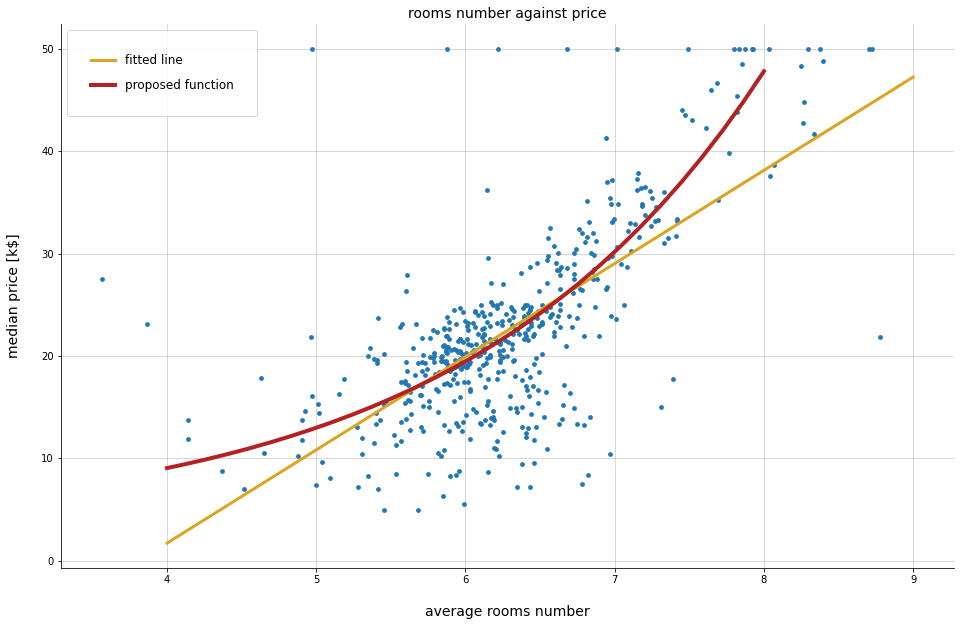

In [4]:
boston_RM = boston_data[:, np.newaxis, 5]

lin_reg = LinearRegression()

lin_reg.fit(boston_RM, boston_target)

print('RM Line equation: y =', lin_reg.coef_[0], '* x +', lin_reg.intercept_, '\n')
print('fit score: ', lin_reg.score(boston_RM, boston_target), '\n')

custom_plot(data=boston_RM, 
            target=boston_target, 
            coefs=Coefs(lin_reg.coef_, lin_reg.intercept_), 
            xname='average rooms number', 
            yname='median price [k$]', 
            title='rooms number against price')

# function "fitted" using desmos ;p. It seemed as some kind of exponential function so I played with 
# coeffisiens for a couple of minutes
x = [i for i in np.linspace(4.0, 8.0, num=30)]
y = [10*math.pow(math.e, (i - 5)/2) + 3 for i in x]

plt.plot(x, y, color="firebrick", linewidth=4)
plt.legend(['fitted line', 'proposed function'], fontsize=12, borderpad=2, labelspacing=1)
plt.show()

fit score - not perfect "enough" to call it strongly linear dependent. Anyway linear function is positive.

### 6-th column - proportion of owner-occupied units built prior to 1940

AGE Line equation: y = -0.12316272123567973 * x + 30.978677762618045 

fit score:  0.14209474407780465 



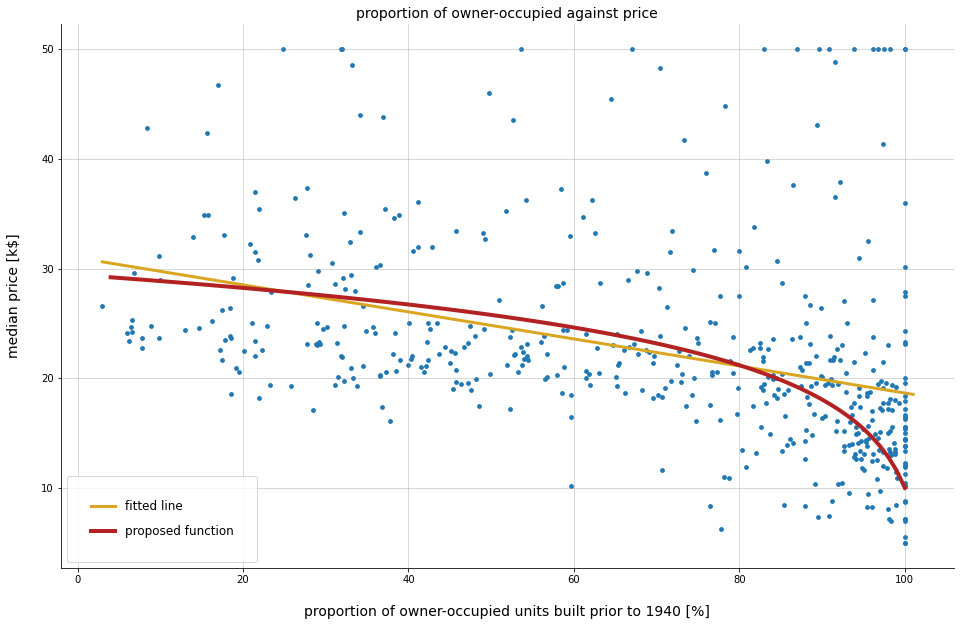

In [5]:
boston_AGE = boston_data[:, np.newaxis, 6]


lin_reg.fit(boston_AGE, boston_target)

print('AGE Line equation: y =', lin_reg.coef_[0], '* x +', lin_reg.intercept_, '\n')
print('fit score: ', lin_reg.score(boston_AGE, boston_target), '\n')

custom_plot(data=boston_AGE, 
            target=boston_target, 
            coefs=Coefs(lin_reg.coef_, lin_reg.intercept_), 
            xname='proportion of owner-occupied units built prior to 1940 [%]', 
            yname='median price [k$]', 
            title='proportion of owner-occupied against price')

# similar situation but in this case the "line break" at the end of x axis suggested a bit transformed logharitmic function
x = [i for i in range(4, 101)]
y = [math.log(abs(i - 103), 1.2) + 4 for i in x]

plt.plot(x, y, color="firebrick", linewidth=4)
plt.legend(['fitted line', 'proposed function'], fontsize=12, borderpad=2, labelspacing=1)
plt.show()


proportion of owner-occupied units built prior to 1940 is very weakly and negativly linear dependant to median price value - fit score is terrible, as we can see data is hardly scattered on y axis.